In [13]:
import pandas as pd
from rdkit import Chem
import seaborn as sns
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
keep_cols_all = ["CANONICAL_SMILES", "INCHIKEY", "active", "dataset", "data_type", "common_name", "action_type"]


# Combining data

We are going to combine data from the ChEMBL and Veith datasets to try and come up with a set of compounds to test

# Veith

Assay data from veith et al


In [14]:
veith = pd.read_csv("processed/veith_2009.csv")
veith.head()

,PubChemCID,SMILES,Active,CANONICAL_SMILES,INCHIKEY,dataset,data_type,common_name,action_type
0,6602638.0,CCCC(=O)Nc1ccc(N2CCN(CC)CC2)c(Cl)c1.Cl,0,CCCC(=O)Nc1ccc(N2CCN(CC)CC2)c(Cl)c1,ULLDFBZUOXJYID-UHFFFAOYSA-N,veith_2009,assay,NaN,inhibitor
1,644510.0,O=c1[nH]c2cc3c(cc2cc1CN(CCCO)Cc1nnnn1Cc1ccc(F)...,1,O=c1[nH]c2cc3c(cc2cc1CN(CCCO)Cc1nnnn1Cc1ccc(F)...,VTLXYSNKFGEFDQ-UHFFFAOYSA-N,veith_2009,assay,NaN,inhibitor
2,1960010.0,CCN1C(=O)/C(=C2\SC(=S)N(CCCOC)C2=O)c2ccccc21,1,CCN1C(=O)/C(=C2\SC(=S)N(CCCOC)C2=O)c2ccccc21,JNCIAHUGNMSHOQ-YPKPFQOOSA-N,veith_2009,assay,NaN,inhibitor
3,644675.0,CC(=O)N(c1ccc2oc(=O)sc2c1)S(=O)(=O)c1cccs1,1,CC(=O)N(c1ccc2oc(=O)sc2c1)S(=O)(=O)c1cccs1,GEUQHFHLRHDTPU-UHFFFAOYSA-N,veith_2009,assay,NaN,inhibitor
4,644851.0,Clc1ccccc1-c1nc(-c2ccccc2)n[nH]1,1,Clc1ccccc1-c1n[nH]c(-c2ccccc2)n1,AHWJVKKSEVAPMR-UHFFFAOYSA-N,veith_2009,assay,NaN,inhibitor


<Axes: xlabel='Active', ylabel='count'>

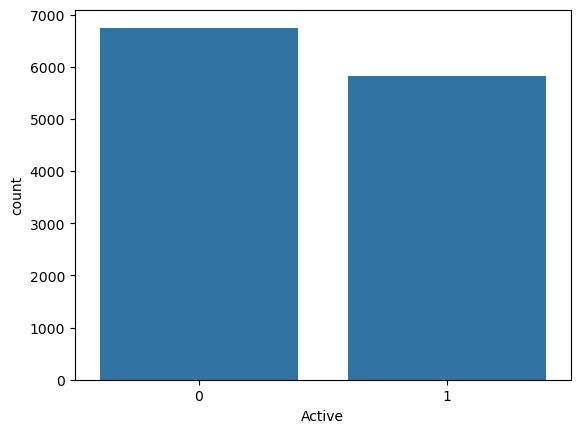

In [15]:
sns.countplot(data=veith, x="Active")

In [17]:
veith_actives = veith.query("Active == 1")
veith_actives["active"] = True
veith_actives = veith_actives[keep_cols_all]

/var/folders/4h/4_v2nd3n4dn85gnfv734rbbc0000gn/T/ipykernel_31005/1919675608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veith_actives["active"] = True


In [18]:
veith_actives

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type
1,O=c1[nH]c2cc3c(cc2cc1CN(CCCO)Cc1nnnn1Cc1ccc(F)...,VTLXYSNKFGEFDQ-UHFFFAOYSA-N,True,veith_2009,assay,NaN,inhibitor
2,CCN1C(=O)/C(=C2\SC(=S)N(CCCOC)C2=O)c2ccccc21,JNCIAHUGNMSHOQ-YPKPFQOOSA-N,True,veith_2009,assay,NaN,inhibitor
3,CC(=O)N(c1ccc2oc(=O)sc2c1)S(=O)(=O)c1cccs1,GEUQHFHLRHDTPU-UHFFFAOYSA-N,True,veith_2009,assay,NaN,inhibitor
4,Clc1ccccc1-c1n[nH]c(-c2ccccc2)n1,AHWJVKKSEVAPMR-UHFFFAOYSA-N,True,veith_2009,assay,NaN,inhibitor
5,COc1ccccc1CNC(=O)Cn1nnc(-c2ccncc2)n1,OJEJKWUQFREXKZ-UHFFFAOYSA-N,True,veith_2009,assay,NaN,inhibitor
...,...,...,...,...,...,...,...
11950,Cc1cc(OCc2ccc([N+](=O)[O-])cc2)c2c3c(c(=O)oc2c...,ZFOUCGXCHMOGAD-UHFFFAOYSA-N,True,veith_2009,assay,NaN,inhibitor
11952,COc1cc(CNC2CCCC2)cc(Cl)c1OCc1ccccc1Cl,PKSMIXVRARBJHK-UHFFFAOYSA-N,True,veith_2009,assay,NaN,inhibitor
11956,O=C(CSc1nnc(SCc2cccc3ccccc23)s1)c1ccc2c(c1)OCO2,WOJKMKPLQQABSF-UHFFFAOYSA-N,True,veith_2009,assay,NaN,inhibitor
11961,Cc1ccnc(NC(=S)NC(=O)c2ccco2)c1,WBCVNVHMWHVHQN-UHFFFAOYSA-N,True,veith_2009,assay,NaN,inhibitor


# Chembl

The chembl data is an aggregation for CYP1A2

Some postprocessing steps have been applied to select high quality actives from the range of assays available, defs not the only way to do this. 




* Select assays with IC50, AC50, pIC50, XC50, EC50, Ki or potency endpoints
* Select assays in nM
* Select assays with >=  N molecules (10)
* Select compounds with mean pChembl > 5 accross all assays
* Select compounds that appear in >= L of assays



In [19]:
chembl_actives = pd.read_csv("processed/chembl_active_selected.csv")
chembl_actives.head()

,CANONICAL_SMILES,INCHIKEY,pChEMBL mean,pChEMBL std,common_name,appears_in_N_ChEMBL_assays,action_type,dataset,active
0,O=c1cc(-c2ccccc2)oc2c1ccc1ccccc12,VFMMPHCGEFXGIP-UHFFFAOYSA-N,7.594167,0.585390,ALPHA-NAPHTHOFLAVONE,12,NaN,ChEMBL_curated,True
1,CC(C)NC[C@@H](O)COc1cccc2ccccc12,AQHHHDLHHXJYJD-CQSZACIVSA-N,6.385714,0.414039,DEXPROPRANOLOL,7,NaN,ChEMBL_curated,True
2,Cc1nc2c(=O)n(C)c(=O)n(Cc3ccco3)c2[nH]1,KGQZGCIVHYLPBH-UHFFFAOYSA-N,5.324000,0.673817,FURAFYLLINE,5,NaN,ChEMBL_curated,True
3,COC(=O)C1=C(C)N=C(C)C(C(=O)OC)C1c1ccccc1[N+](=...,OSUCQKNXQBPLDG-UHFFFAOYSA-N,6.715000,0.817537,NIFEDIPINE,4,NaN,ChEMBL_curated,True
4,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,REFJWTPEDVJJIY-UHFFFAOYSA-N,5.925000,0.460326,QUERCETIN,4,NaN,ChEMBL_curated,True


# FDA approved

Compounds the FDA really reccomends you try

In [20]:
fda = pd.read_csv("./processed/fda.csv")

# Combine everything


## NOTE

common name being blank is not that these compounds do not have a common name, but that they need to be pulled from pubchem